1. For the data set you have chosen choose any response variable that is numeric (and not discrete) to
model for regression. (This does not have to be directly related to the final goal of your project.)
2. Choose a single variable or variables to use as predictors. (You can try variable selection, but it is not
necessary.)
3. Model your regression and calculate the evaluation metrics on your training and validation data sets.
4. Answer in your notebook if you see evidence of overfitting or underfitting.
5. Use one regularization technique and evaluate its performance.
6. Include code and explanation for the steps above in your notebook.

1. The response variable that we choose is energy.
2. The predictor is voudnessalence.l

In [35]:
%pip install plotly scikit-learn scikit-lego
%pip install nbformat --upgrade
%pip install plotly --upgrade


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

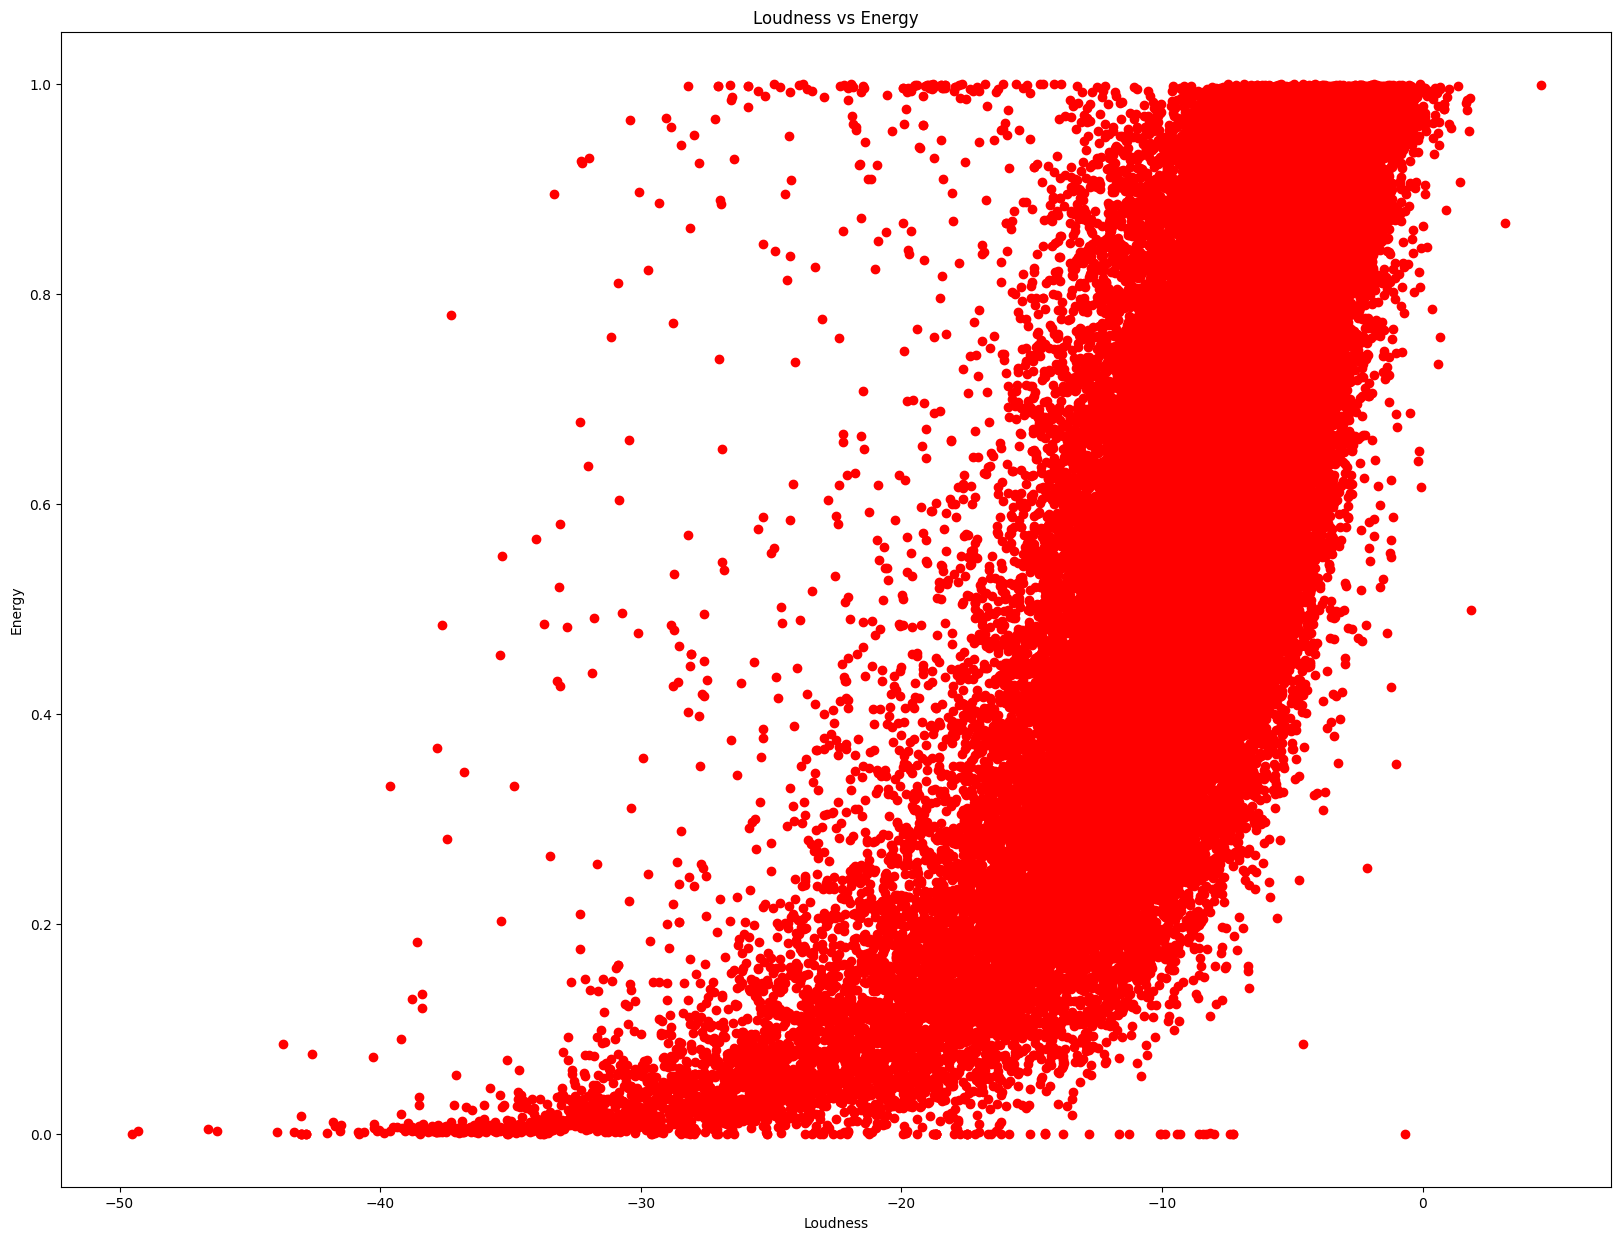

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df.dropna(inplace=True) # remove all rows with missing values
df.drop_duplicates(subset=['track_name', 'artists'], inplace=True)

X = df[['loudness']] 
y = df['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(20, 15))
plt.scatter(X_train, y_train, color='red')
plt.title('Loudness vs Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')

plt.show()

model = LinearRegression()
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MAD = np.mean(np.abs(y_test - y_pred))
correlation = y_test.corr(pd.Series(y_pred))
R2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"MAE: {MAE:.4f}")
print(f"MAD: {MAD:.4f}")
print(f"Correlation: {correlation:.4f}")
print(f"R²: {R2:.4f}")



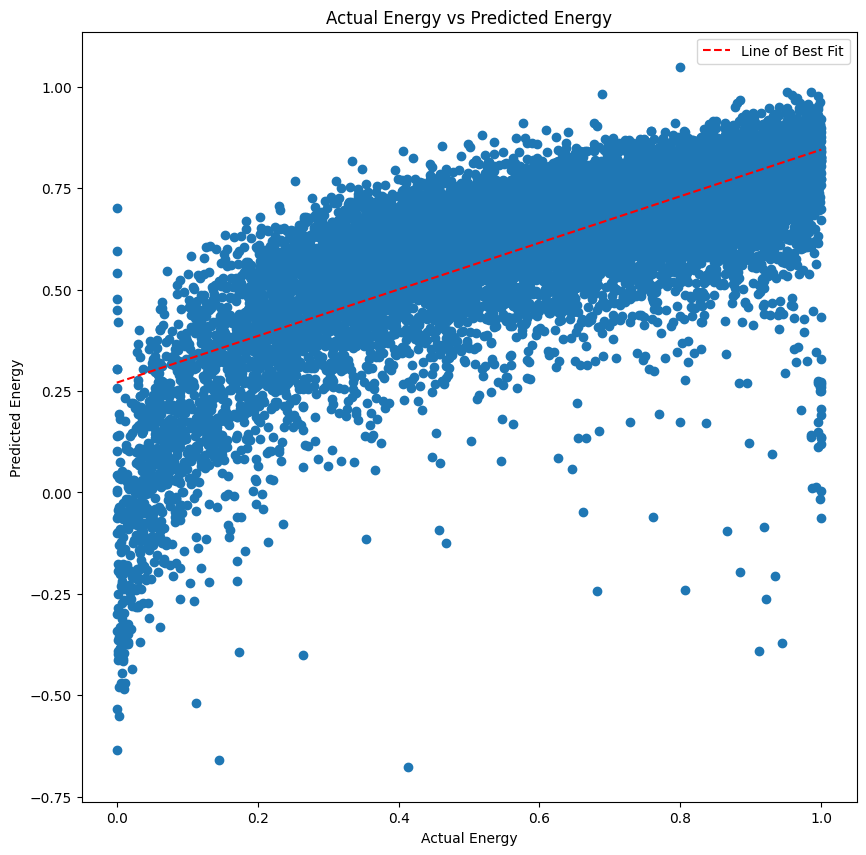

In [130]:
import matplotlib.pyplot as plt

# create plot
figure = plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title('Actual Energy vs Predicted Energy')

# line of best fit
best_fit_model = LinearRegression()
best_fit_model.fit(y_test.values.reshape(-1, 1), y_pred)  # Fit using y_test as input and y_pred as output
line_x = np.linspace(min(y_test), max(y_test), 100).reshape(-1, 1)  # Generate line points for y_test
line_y = best_fit_model.predict(line_x)  # Predict values for the line of best fit

plt.plot(line_x, line_y, color='red', linestyle='--', label='Line of Best Fit')
plt.legend()

# show plot
plt.show()

The model is currently underfitting, because we are doing linear regression against curves.

In [120]:
# regularization (L1 loss)
lad_model = LADRegression()
lad_model.fit(X_train, y_train)

y_pred_lad = model.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred_lad)
MAE = mean_absolute_error(y_test, y_pred_lad)
MAD = np.mean(np.abs(y_test - y_pred_lad))
correlation = y_test.corr(pd.Series(y_pred_lad))
R2 = r2_score(y_test, y_pred_lad)
print(f"Mean Squared Error: {mse}")
print(f"MAE: {MAE:.4f}")
print(f"MAD: {MAD:.4f}")
print(f"Correlation: {correlation:.4f}")
print(f"R²: {R2:.4f}")

Mean Squared Error: 0.0283572804581753
MAE: 0.1346
MAD: 0.1346
Correlation: 0.0053
R²: 0.5755
